In [1]:
!pip install librosa

  Created wheel for audioread: filename=audioread-2.1.9-py3-none-any.whl size=23154 sha256=05e4135237ccb880ebdcd59e628d4e660b976ef1c0c79f1f7c89acb6306eca1c
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\a2\a3\bd\ec1568ce7515115a11ab686d509ad302124c782af065de47ee
Successfully built audioread


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
filename = 'C:/Users/User/speech_recognition_DL/24074-1-0-5.wav'

In [7]:
import IPython.display as ipd
import librosa
import librosa.display

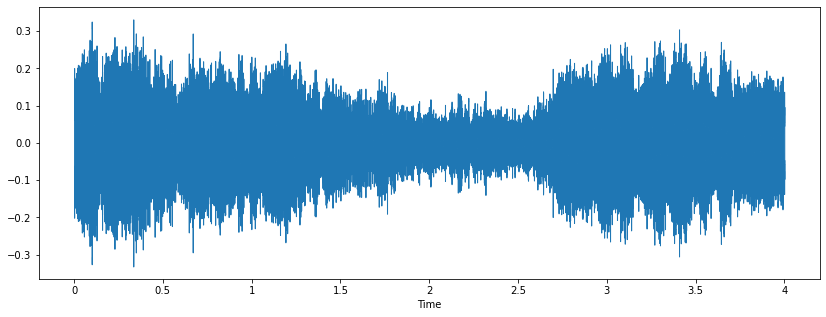

In [9]:
plt.figure(figsize=(14,5))
data,sample_rate = librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename) 

In [12]:
sample_rate

22050

In [10]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(filename) 

In [11]:
wave_sample_rate

44100

In [14]:
import pandas as pd

metadata = pd.read_csv('C:/Users/User/OneDrive/Desktop/TVD/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,Unnamed: 1,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [15]:
metadata['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [18]:
audio_file_path = 'C:/Users/User/OneDrive/Desktop/TVD/UrbanSound8K/audio/fold2/14387-9-0-12.wav'
librosa_audio_data, librosa_sample_rate = librosa.load(audio_file_path)

# Extract Features

Here we will be using MEl-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characterstics of the sound. These audio representations will allow us to identify features for classification.

In [19]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [25]:
mfccs

array([[-312.2829    , -284.69263   , -283.36774   , ..., -298.34045   ,
        -286.36572   , -283.9917    ],
       [ 139.53558   ,  142.68439   ,  148.56302   , ...,  151.46252   ,
         133.39682   ,  133.75409   ],
       [ -36.949432  ,  -40.0291    ,  -41.79673   , ...,  -35.242573  ,
         -44.398354  ,  -46.0821    ],
       ...,
       [  -9.151139  ,  -13.156546  ,  -14.313558  , ...,    1.2248651 ,
           2.8598268 ,   -0.49193114],
       [  12.5053215 ,   12.0447235 ,    8.651161  , ...,    4.6553774 ,
           3.305229  ,    2.7076216 ],
       [  12.957653  ,   13.242857  ,    7.5190287 , ...,   -4.075455  ,
          -4.949451  ,   -3.421329  ]], dtype=float32)

In [21]:
print(librosa_audio_data)

[-0.00700853 -0.008516   -0.00426655 ... -0.00061543 -0.00099588
 -0.00295256]


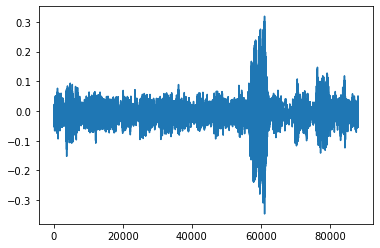

In [22]:
plt.plot(librosa_audio_data)


## Observation

 Here Librosa converts the signal to mono, meaning the channel will alays be 1

In [23]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path)

In [24]:
wave_audio

array([[ 158, -781],
       [ 140, -737],
       [ 164, -672],
       ...,
       [ 532, -622],
       [ 462, -663],
       [ 342, -616]], dtype=int16)

In [66]:
import pandas as pd
import os
import librosa

audio_dataset_path = 'C:/Users/User/OneDrive/Desktop/TVD/UrbanSound8K/audio'
metadata = pd.read_csv('C:/Users/User/OneDrive/Desktop/TVD/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,Unnamed: 1,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [28]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type = 'kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y = audio, sr = sample_rate, n_mfcc = 40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    return mfccs_scaled_features

In [29]:
import numpy as np
from tqdm import tqdm

extracted_features = []
for index_num, row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path), 'fold' + str(row["fold"])+'/', str(row["slice_file_name"]))
    final_class_labels = row["class"]
    data = features_extractor(file_name)
    extracted_features.append([data, final_class_labels])

3554it [04:47, 12.40it/s]C:\Users\User\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)
8326it [11:51, 20.61it/s]C:\Users\User\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)
8732it [12:21, 11.77it/s]


In [32]:
extracted_features_df = pd.DataFrame(extracted_features, columns = ['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22338, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66373, -35.42945, 53.036354, ...",children_playing
4,"[-446.60352, 113.68541, -52.402206, 60.302044,...",children_playing


In [74]:
X = np.array(extracted_features_df['feature'].tolist())
y = np.array(extracted_features_df['class'].tolist())

In [75]:
X.shape

(8732, 40)

In [76]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [77]:
new_y = y
new_y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [78]:
y = np.array(pd.get_dummies(y))

In [79]:
y.shape

(8732, 10)

In [80]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=uint8)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [40]:
X_train.shape

(6985, 40)

In [41]:
y_train.shape

(6985, 10)

In [42]:
X_test.shape

(1747, 40)

In [43]:
y_test.shape

(1747, 10)

In [44]:
X_train

array([[-1.31104706e+02,  1.12505905e+02, -2.25746956e+01, ...,
         3.24665260e+00, -1.36902368e+00,  2.75575495e+00],
       [-1.36703424e+01,  9.10850830e+01, -7.79273319e+00, ...,
        -3.25305033e+00, -5.27745247e+00, -1.55697143e+00],
       [-4.98715439e+01,  2.65352994e-01, -2.05009365e+01, ...,
         2.85459447e+00, -1.60920441e+00,  3.52480578e+00],
       ...,
       [-4.27012360e+02,  9.26230469e+01,  3.12939739e+00, ...,
         7.42641389e-01,  7.33490825e-01,  7.11009085e-01],
       [-1.45754608e+02,  1.36265778e+02, -3.35155220e+01, ...,
         1.46811950e+00, -2.00917006e+00, -8.82181883e-01],
       [-4.21031342e+02,  2.10654541e+02,  3.49066067e+00, ...,
        -5.38886738e+00, -3.37136054e+00, -1.56651151e+00]], dtype=float32)

In [45]:
y_train

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=uint8)

# Model Creation

In [46]:
import tensorflow as tf

In [47]:
print(tf.__version__)

2.8.0


In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [49]:
num_labels = y.shape[1]

In [51]:
model = Sequential()
#First Layer
model.add(Dense(100, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#Second Layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#Third Layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#Final Layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [53]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [58]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_model.audio_classification.hdf5', verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)
duration=datetime.now() - start
print("Training Completed in time: ", duration)

Epoch 1/100
216/219 [============================>.] - ETA: 0s - loss: 0.8647 - accuracy: 0.7120
Epoch 1: val_loss improved from inf to 0.68289, saving model to saved_model.audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 0.8641 - accuracy: 0.7121 - val_loss: 0.6829 - val_accuracy: 0.7945
Epoch 2/100
202/219 [==========================>...] - ETA: 0s - loss: 0.8492 - accuracy: 0.7178
Epoch 2: val_loss improved from 0.68289 to 0.64188, saving model to saved_model.audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 0.8458 - accuracy: 0.7178 - val_loss: 0.6419 - val_accuracy: 0.8014
Epoch 3/100
214/219 [============================>.] - ETA: 0s - loss: 0.8667 - accuracy: 0.7190
Epoch 3: val_loss did not improve from 0.64188
219/219 [==============================] - 1s 3ms/step - loss: 0.8677 - accuracy: 0.7185 - val_loss: 0.6640 - val_accuracy: 0.7991
Epoch 4/100
210/219 [===========================>..] - ETA: 0

219/219 [==============================] - 1s 4ms/step - loss: 0.8542 - accuracy: 0.7145 - val_loss: 0.6536 - val_accuracy: 0.7894
Epoch 30/100
200/219 [==========================>...] - ETA: 0s - loss: 0.8781 - accuracy: 0.7059
Epoch 30: val_loss did not improve from 0.63030
219/219 [==============================] - 1s 3ms/step - loss: 0.8782 - accuracy: 0.7074 - val_loss: 0.6796 - val_accuracy: 0.7831
Epoch 31/100
207/219 [===========================>..] - ETA: 0s - loss: 0.8687 - accuracy: 0.7156
Epoch 31: val_loss did not improve from 0.63030
219/219 [==============================] - 1s 3ms/step - loss: 0.8661 - accuracy: 0.7152 - val_loss: 0.6682 - val_accuracy: 0.7951
Epoch 32/100
208/219 [===========================>..] - ETA: 0s - loss: 0.8713 - accuracy: 0.7171
Epoch 32: val_loss did not improve from 0.63030
219/219 [==============================] - 1s 3ms/step - loss: 0.8736 - accuracy: 0.7173 - val_loss: 0.6661 - val_accuracy: 0.8065
Epoch 33/100
213/219 [================

Epoch 59/100
202/219 [==========================>...] - ETA: 0s - loss: 0.7935 - accuracy: 0.7404
Epoch 59: val_loss did not improve from 0.63004
219/219 [==============================] - 1s 3ms/step - loss: 0.8035 - accuracy: 0.7377 - val_loss: 0.6393 - val_accuracy: 0.7951
Epoch 60/100
213/219 [============================>.] - ETA: 0s - loss: 0.8553 - accuracy: 0.7173
Epoch 60: val_loss did not improve from 0.63004
219/219 [==============================] - 1s 4ms/step - loss: 0.8565 - accuracy: 0.7168 - val_loss: 0.6541 - val_accuracy: 0.7985
Epoch 61/100
218/219 [============================>.] - ETA: 0s - loss: 0.8319 - accuracy: 0.7261
Epoch 61: val_loss improved from 0.63004 to 0.62277, saving model to saved_model.audio_classification.hdf5
219/219 [==============================] - 1s 5ms/step - loss: 0.8323 - accuracy: 0.7261 - val_loss: 0.6228 - val_accuracy: 0.8037
Epoch 62/100
211/219 [===========================>..] - ETA: 0s - loss: 0.8439 - accuracy: 0.7148
Epoch 62: va

219/219 [==============================] - 1s 3ms/step - loss: 0.8286 - accuracy: 0.7201 - val_loss: 0.6398 - val_accuracy: 0.8031
Epoch 89/100
203/219 [==========================>...] - ETA: 0s - loss: 0.8026 - accuracy: 0.7341
Epoch 89: val_loss did not improve from 0.62277
219/219 [==============================] - 1s 3ms/step - loss: 0.8129 - accuracy: 0.7306 - val_loss: 0.6278 - val_accuracy: 0.8031
Epoch 90/100
202/219 [==========================>...] - ETA: 0s - loss: 0.8085 - accuracy: 0.7373
Epoch 90: val_loss did not improve from 0.62277
219/219 [==============================] - 1s 3ms/step - loss: 0.8115 - accuracy: 0.7339 - val_loss: 0.6375 - val_accuracy: 0.8100
Epoch 91/100
218/219 [============================>.] - ETA: 0s - loss: 0.8306 - accuracy: 0.7276
Epoch 91: val_loss did not improve from 0.62277
219/219 [==============================] - 1s 3ms/step - loss: 0.8307 - accuracy: 0.7277 - val_loss: 0.6340 - val_accuracy: 0.7997
Epoch 92/100
205/219 [================

In [59]:
test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(test_accuracy[1])

0.8030909895896912


In [63]:
filename="C:/Users/User/OneDrive/Desktop/TVD/UrbanSound8K/audio/fold3/9223-2-0-9.wav"
prediction_feature=features_extractor(filename)
prediction_feature=prediction_feature.reshape(1,-1)
predict_x=model.predict(prediction_feature) 
classes_x=np.argmax(predict_x,axis=1)
# model.predict_classes(prediction_feature)

In [64]:
classes_x

array([1], dtype=int64)

In [68]:
metadata['class'].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

## ANN

In [70]:
import tensorflow

In [81]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
new_y = to_categorical(labelencoder.fit_transform(new_y))

In [82]:
new_y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [85]:
filename = filename="C:/Users/User/OneDrive/Desktop/TVD/UrbanSound8K/audio/fold3/9223-2-0-9.wav"
audio, sample_rate = librosa.load(file_name, res_type = 'kaiser_fast')
mfccs_features = librosa.feature.mfcc(y = audio, sr = sample_rate, n_mfcc = 40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label = model.predict(mfccs_scaled_features)
predicted_label = np.argmax(predicted_label,axis=1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label)
prediction_class

[-315.6028       94.854805    -37.22234      46.778263     -6.728693
   10.012548     -1.6075529    18.51134     -11.9006195     7.5940356
   -7.8546596    11.362425    -15.617317      3.3019907   -11.958162
    6.353489     -5.5870256    20.78539      -0.46922812    6.0436325
  -11.619548      2.8686748   -10.176432      8.332485      1.776561
    2.5638974   -14.761059      1.1465563     3.7835658     3.1094651
  -12.185813     -3.0522912     3.728414      8.962752      0.93064487
    3.18008       2.485049      0.6138646   -11.449189     -6.0105853 ]
[[-315.6028       94.854805    -37.22234      46.778263     -6.728693
    10.012548     -1.6075529    18.51134     -11.9006195     7.5940356
    -7.8546596    11.362425    -15.617317      3.3019907   -11.958162
     6.353489     -5.5870256    20.78539      -0.46922812    6.0436325
   -11.619548      2.8686748   -10.176432      8.332485      1.776561
     2.5638974   -14.761059      1.1465563     3.7835658     3.1094651
   -12.185813    

array(['car_horn'], dtype='<U16')